<center>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Dauphine_logo_2019_-_Bleu.png" style="width: 600px;"/> 
</center>  

<div align="center"><span style="font-family:Arial Black;font-size:33px;color:darkblue"> Master Economie Finance </span></div>

<div align="center"><span style="font-family:Arial Black;font-size:27px;color:darkblue">Application Lab – Portfolio Management</span></div>

<div align="center"><span style="font-family:Arial Black;font-size:20px;color:darkblue">Time series data modelling
</span></div>

In [1]:
!pip install pandas > /dev/null 2>&1
!pip install numpy > /dev/null 2>&1
!pip install yfinance > /dev/null 2>&1
!pip install matplotlib > /dev/null 2>&1
!pip install seaborn > /dev/null 2>&1
!pip install arch > /dev/null 2>&1

Some cells in the notebook may display large amounts of information.
For these cells, you can activate “Scrollable Output” by right-clicking on the cell and selecting the option. This makes navigation in the notebook easier.

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import NullLocator
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")

<div class="alert alert-success">
    <b>EXERCISE: Data download and transformation</b>:
    <ul>
        <li>Download the Close prices for the following tickers: 
            <code>'JPM', 'BAC', 'C', 'GS', 'MS'</code> 
            using <code>yfinance</code>. Set the start date to <code>'2010-01-01'</code> and the end date to <code>'2025-08-31'</code>.</li>
        <li>Transform the Adjusted Close prices into log returns for each stock and times 100.
        <li>Create a new DataFrame named <code>log_returns</code> to store the calculated log returns for all stocks. Hint: check the shift method for dataframe</li>
        <li>Drop missing values (e.g., NaN values) resulting from the transformation.</li>
        <li>Visualize the Price and log returns of <code>'JPM'</code> using the plot function of pyplot.</li>
    </ul>
</div>

In [3]:
tickers = ['JPM', 'BAC', 'C', 'GS', 'MS']

if os.path.exists('data_yahoo_finance.csv'): # check if data are already downloaded and save in the working directory
    print('loading data from csv in the working directory')
    data = pd.read_csv('data_yahoo_finance.csv', index_col='Date')
    data.index = pd.to_datetime(data.index) # ensuring date format for index
else:
    #it not we download and save them.
    print("downloading data from yf")
    data = yf.download(tickers, start="2010-01-01", end="2025-08-31")['Close']
    data.to_csv('data_yahoo_finance.csv')

data = data.dropna()
data.head()

loading data from csv in the working directory


BAC          C          GS        JPM         MS
Date                                                              
2010-01-04  12.232429  25.228096  131.289185  28.552141  21.862963
2010-01-05  12.630040  26.192694  133.610352  29.105202  22.662220
2010-01-06  12.778167  27.008909  132.184280  29.265104  22.952217
2010-01-07  13.199173  27.083103  134.770905  29.844826  23.284657
2010-01-08  13.082228  26.637903  132.222153  29.771523  22.810757

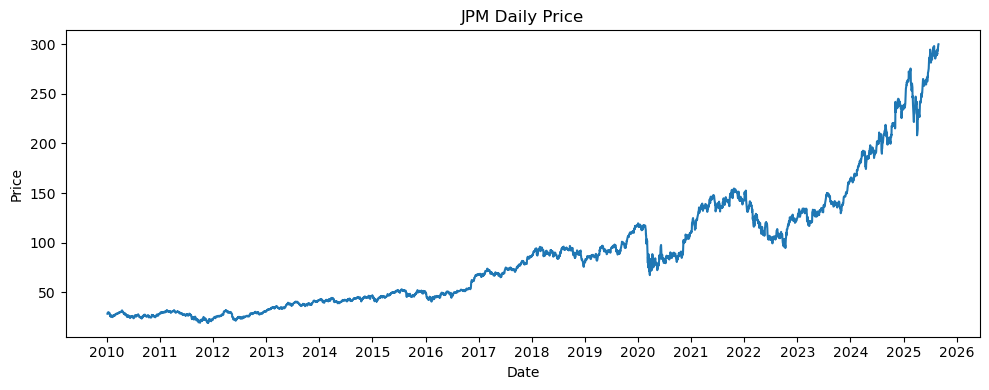

In [4]:
plt.figure(figsize=(10, 4))
ax = plt.gca()  # get the current axis
plt.plot(data.index, data['JPM'])
plt.title('JPM Daily Price')
plt.xlabel('Date')
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.xaxis.set_minor_locator(NullLocator())
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [5]:
log_returns = 100 * np.log(data / data.shift(1))
log_returns = log_returns.dropna()
log_returns.head()

BAC         C        GS       JPM        MS
Date                                                        
2010-01-05  3.198761  3.752221  1.752533  1.918498  3.590522
2010-01-06  1.165988  3.068628 -1.073073  0.547892  1.271532
2010-01-07  3.241618  0.274325  1.937932  1.961566  1.438009
2010-01-08 -0.889953 -1.657490 -1.909285 -0.245917 -2.056242
2010-01-11  0.889953  1.108000 -1.590177 -0.336265 -0.653299

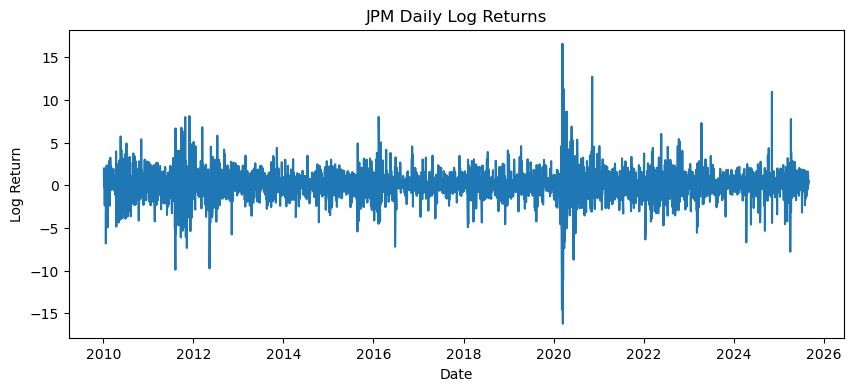

In [6]:
plt.figure(figsize=(10, 4))
plt.plot(log_returns['JPM'])
plt.title('JPM Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.show()

Why is stationary matter?
- A time series is stationary if its statistical properties (mean, variance,
autocorrelations) are constant over time. More formally: the distribution of the series does not change over
time.
- Most time series models (ARIMA, VAR, etc.) assume stationarity.
- Stationarity ensures that relationships between variables are stable and predictable.

Check Stationarity (ADF Test)

In [7]:
from statsmodels.tsa.stattools import adfuller

jpm_price = data['JPM'].to_numpy()

adf_result = adfuller(jpm_price)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

ADF Statistic: 2.5499257570075144
p-value: 0.9990642014100913
Critical Values: {'1%': -3.4320171546099365, '5%': -2.8622766576624628, '10%': -2.5671621313805835}


ADF Statistic: 2.55
- The ADF statistic is positive.
- To reject the null hypothesis of non-stationarity, the ADF statistic must be less than (i.e., more negative than) the critical values.
- Here, 2.55 is far above all critical values, meaning the test does not support stationarity.

p-value: 0.99
- A p-value this high means there is almost no evidence against the null hypothesis.
- We fail to reject H₀ (the series has a unit root, i.e., is non-stationary).

In [8]:
#We can see that the close price of JPM is not stationary, now test for log returns of JPM
jpm_return = log_returns['JPM'].to_numpy()

adf_result = adfuller(jpm_return)
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

ADF Statistic: -12.730321759219514
p-value: 9.406032029740371e-24
Critical Values: {'1%': -3.4320231263589913, '5%': -2.862279295629063, '10%': -2.567163535727597}


ADF Statistic: –12.73
- This value is far more negative than all the critical values.
- Since –12.73 < –3.43, we reject the null hypothesis of a unit root.

p-value: 9.4 × 10⁻²⁴
- This is extremely close to zero.
- It means there is strong evidence for stationarity.


We Reject H₀ (the series has a unit root).
The series is stationary.

## Autoregressive (AR) Model

$$
X_t = \phi_0 + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \epsilon_t
$$

### PACF

When modeling real data with an AR model, the order $p$ is unknown. Determining $p$ is called the problem of order selection. Common methods include the partial autocorrelation function (PACF) and the AIC or BIC criterion.

Let $X_1, \ldots, X_n, Y$ be random variables, and define

$$
L(Y|X_1, \ldots, X_n) = \arg\min_{\hat{Y}=b_0+b_1X_1+\cdots+b_nX_n} E(Y-\hat{Y})^2,
$$

which is called the best linear prediction of $Y$ using $X_1, \ldots, X_n$. The correlation coefficient between $Y - L(Y|X_1, \ldots, X_n)$ and $Z - L(Z|X_1, \ldots, X_n)$ is called the **partial correlation coefficient** between $Y$ and $Z$ after removing the effect of $X_1, \ldots, X_n$.

For a stationary linear time series, for $n=1,2,\ldots$, we have

$$
L(X_t | X_{t-1}, \ldots, X_{t-n}) = \phi_{n0} + \phi_{n1} X_{t-1} + \cdots + \phi_{nn} X_{t-n},
$$

where $\phi_{nj}, j=0,1,\ldots,n$ are independent of $t$. $\phi_{nn}$ is the **partial autocorrelation coefficient** of the time series $\{X_t\}$, and the sequence $\{\phi_{nn}\}$ is called the **partial autocorrelation function (PACF)** of the time series $\{X_t\}$.

In fact, $\phi_{nn}$ is the partial correlation coefficient between $X_t$ and $X_{t-n}$ after removing the effect of $X_{t-1}, \ldots, X_{t-(n-1)}$. In particular, $\phi_{11} = \rho_1$.

The sample estimate of $\phi_{nn}$, denoted $\hat{\phi}_{nn}, n=1,2,\ldots$, is called the **sample partial autocorrelation function**. In Python, it can be estimated and plotted using plot_pacf() from statsmodels.

If ${X_t}$ follows the AR($p$) model:

$$
X_t = \phi_0 + \phi_1 X_{t-1} + \cdots + \phi_p X_{t-p} + \varepsilon_t, \quad \phi_p \neq 0,
$$

this means that when predicting $X_t$ using a linear combination of $X_{t-1}, \ldots, X_{t-p}$, only these lags are needed. Adding $X_{t-p-1}, X_{t-p-2}, \ldots$ does not improve the prediction. This implies that $\hat{\phi}_{kk}=0, k>p$. This property is called the cut-off property of the PACF for AR models.


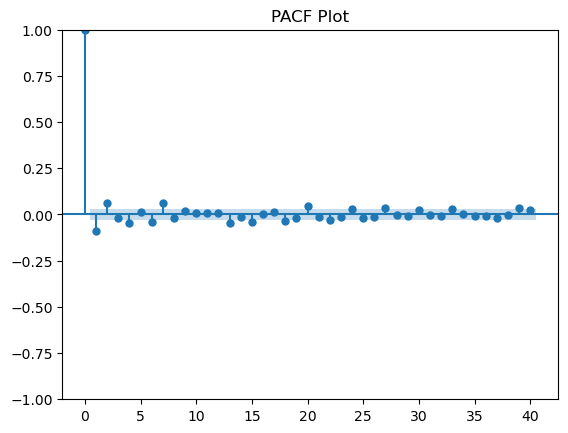

In [9]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(jpm_return, lags=40)
plt.title("PACF Plot")
plt.show()

There are generally 2 ways of fitting a AR model, ARIMA is perfered, standard errors are more precise.

In [10]:
from statsmodels.tsa.ar_model import AutoReg

ar_model = AutoReg(jpm_return, lags=1).fit()
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 3938
Model:                     AutoReg(1)   Log Likelihood               -7761.701
Method:               Conditional MLE   S.D. of innovations              1.738
Date:                Fri, 28 Nov 2025   AIC                          15529.402
Time:                        13:04:59   BIC                          15548.236
Sample:                             1   HQIC                         15536.083
                                 3938                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0646      0.028      2.330      0.020       0.010       0.119
y.L1          -0.0889      0.016     -5.602      0.000      -0.120      -0.058
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -11.2472           +0.0000j           11.2472            0.5000
-----------------------------------------------------------------------------
"""

In [11]:
from statsmodels.tsa.arima.model import ARIMA

ar_model = ARIMA(jpm_return, order=(1, 0, 0)).fit()
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3938
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -7763.744
Date:                Fri, 28 Nov 2025   AIC                          15533.488
Time:                        13:05:00   BIC                          15552.323
Sample:                             0   HQIC                         15540.170
                               - 3938                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0597      0.026      2.329      0.020       0.009       0.110
ar.L1         -0.0889      0.007    -11.859      0.000      -0.104      -0.074
sigma2         3.0196      0.031     98.594      0.000       2.960       3.080
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):             12660.51
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Information Criterion

Akaike Information Criterion

It is defined as:

$$
AIC = -\frac{2}{T}\ln(\text{likelihood value}) + \frac{2}{T}(\text{number of parameters}),
$$

where the likelihood value is the likelihood evaluated at the maximum likelihood estimates of the parameters.  
When the model is a higher-order AR(p), i.e., $\{\varepsilon_t\}$ is an independent $N(0,\sigma^2)$ sequence in the AR(p) model, the AIC formula is:

$$
AIC(k) = \ln \hat{\sigma}_k^2 + \frac{2k}{T},
$$

where $k$ is the order of the model, and $\hat{\sigma}_k^2$ is the maximum likelihood estimate of the variance of $\varepsilon_t$ under order $k$.  
$\ln \hat{\sigma}_k^2$ represents the goodness of fit of the model to the data: the smaller the value, the better the fit.  
The term $\frac{2k}{T}$ is a penalty for model complexity: the larger the $k$, the more complex the model, the less stable it is, and the worse its adaptability to future situations.  
Choosing $k$ that minimizes $AIC(k)$ within a certain range achieves a trade-off between goodness of fit and model simplicity.

---

Bayesian Information Criterion

Another commonly used information criterion is the BIC. For a higher-order AR model:

$$
BIC(k) = \ln \hat{\sigma}_k^2 + \frac{k \ln T}{T},
$$

BIC tends to select a lower-order model than AIC.


In [12]:
print(ar_model.aic)
print(ar_model.bic)

15533.488105083197
15552.323389860794


In [13]:
ar_model.bic

15552.323389860794

Prediction for next period

In [14]:
ar_model.forecast(steps = 1)

array([0.05465928])

<div class="alert alert-success">
    <b>EXERCISE: Find the Best Lag Order Using BIC</b>:
    <ul>        
        <li>Fit an AR model for lag orders ranging from 1 to 10. Hint: Use statsmodels ARIMA function.</li> 
        <li>For each lag order, calculate the BIC values of the fitted AR model.</li>
        <li>Create a list to store the  BIC values corresponding to each lag order.</li>
        <li>Find the lag order with the minimum BIC values.</li>
    </ul>
</div>

In [15]:
max_lags = 10
bic_values = []

for p in range(1, max_lags + 1):
    model = ARIMA(jpm_return, order=(p, 0, 0)).fit()
    bic_values.append(model.bic) 

best_bic_order = bic_values.index(min(bic_values)) + 1
print(f"Best lag order based on BIC: {best_bic_order}")

Best lag order based on BIC: 2


In [16]:
max_lags = 10
bic_temp = 100000
best_lag = 0

for p in range(1, max_lags + 1):
    model = ARIMA(jpm_return, order=(p, 0, 0)).fit()
    if model.bic < bic_temp:
        best_lag = p
        bic_temp = model.bic

print(f"Best lag order based on BIC: {best_lag}")

Best lag order based on BIC: 2


Check for residuals

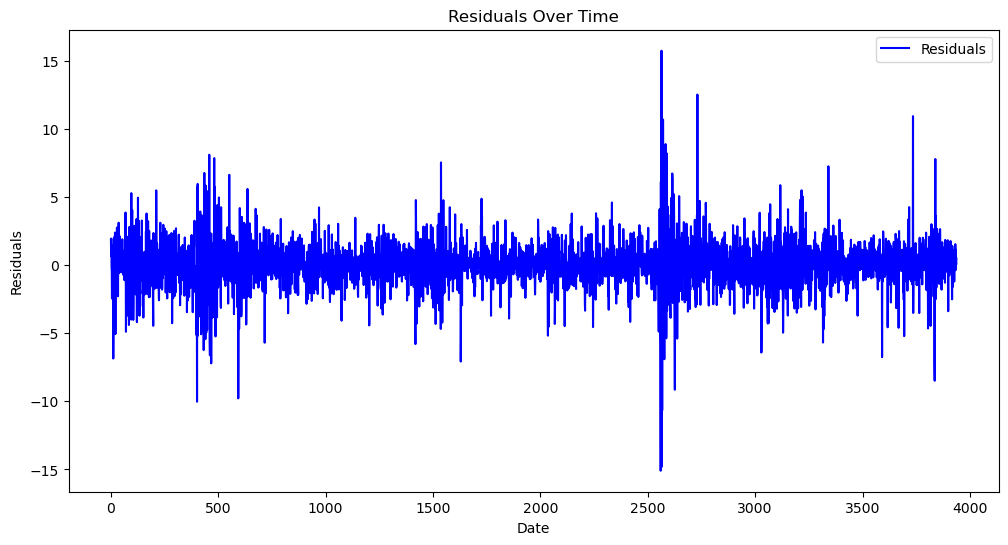

In [17]:
ar_residuals = ar_model.resid

plt.figure(figsize=(12, 6))
plt.plot(ar_residuals, label='Residuals', color='blue')
plt.title("Residuals Over Time")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()
plt.show()

In [18]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Ljung-Box test
ljung_box_result = acorr_ljungbox(ar_residuals, lags=[np.floor(np.sqrt(len(jpm_return)))], return_df=True)
print(ljung_box_result)

       lb_stat     lb_pvalue
62  151.923343  1.647792e-09


Statistic (Q): 151.92
p-value: 1.65 × 10⁻⁹ (almost zero)

Because the p-value is far below any common significance level (0.05, 0.01), we reject the null hypothesis.

Null hypothesis (H₀): Residuals are white noise (no autocorrelation)

Residuals are not white noise.

There is still significant autocorrelation left in the residuals.

The current model is not capturing all structure in the data.

## Moving Average (MA) Model

$$
X_t = \mu + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q}
$$

The MA (Moving Average) model describes the current value (the value of the time series) as being determined by the weighted sum of random error terms.

Select the lag using Autocorrelation Function(ACF) plot

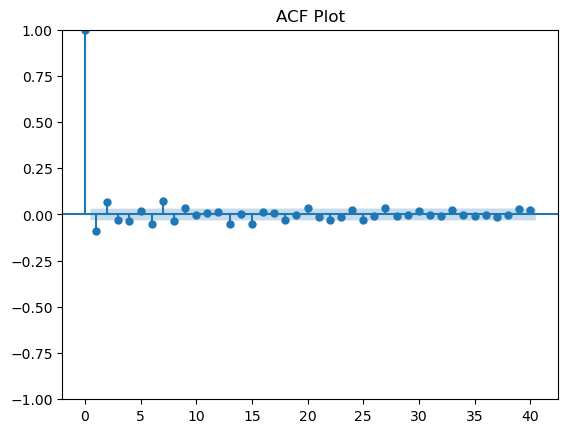

In [19]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(jpm_return, lags=40)
plt.title("ACF Plot")
plt.show()

In [20]:
ma_model = ARIMA(jpm_return, order=(0, 0, 2)).fit()
ma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3938
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -7756.787
Date:                Fri, 28 Nov 2025   AIC                          15521.574
Time:                        13:05:07   BIC                          15546.688
Sample:                             0   HQIC                         15530.483
                               - 3938                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0597      0.028      2.137      0.033       0.005       0.115
ma.L1         -0.0795      0.008    -10.357      0.000      -0.094      -0.064
ma.L2          0.0686      0.009      7.525      0.000       0.051       0.086
sigma2         3.0090      0.031     96.174      0.000       2.948       3.070
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):             12024.41
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Prediction for next period

In [21]:
forecast = ma_model.forecast(steps=1)
forecast

array([0.08719412])

In [22]:
ma_residuals = ma_model.resid

ljung_box_result = acorr_ljungbox(ma_residuals, lags=[np.floor(np.sqrt(len(jpm_return)))], return_df=True)
print(ljung_box_result)

       lb_stat     lb_pvalue
62  139.019397  7.721941e-08


Statistic (Q): 139.02
p-value: 7.72 × 10⁻⁸ (≈ 0.000000077)

The p-value is far below 0.05, so you reject the null hypothesis:

Residuals are not white noise.

There is still significant autocorrelation left.

## Autoregressive Moving Average (ARMA) Model

$$
X_t = \mu + \phi_1 X_{t-1} + \phi_2 X_{t-2} + \dots + \phi_p X_{t-p} + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \dots + \theta_q \epsilon_{t-q}
$$

In [23]:
arma_model = ARIMA(jpm_return, order=(2, 0, 2)).fit()
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3938
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -7740.998
Date:                Fri, 28 Nov 2025   AIC                          15493.996
Time:                        13:05:08   BIC                          15531.667
Sample:                             0   HQIC                         15507.360
                               - 3938                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0597      0.027      2.250      0.024       0.008       0.112
ar.L1         -1.5985      0.028    -56.974      0.000      -1.653      -1.543
ar.L2         -0.8052      0.026    -30.544      0.000      -0.857      -0.754
ma.L1          1.5153      0.032     47.327      0.000       1.453       1.578
ma.L2          0.7313      0.030     24.277      0.000       0.672       0.790
sigma2         2.9848      0.032     93.852      0.000       2.923       3.047
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):             10584.61
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
arma_model.forecast(steps = 1)

array([-0.00349353])

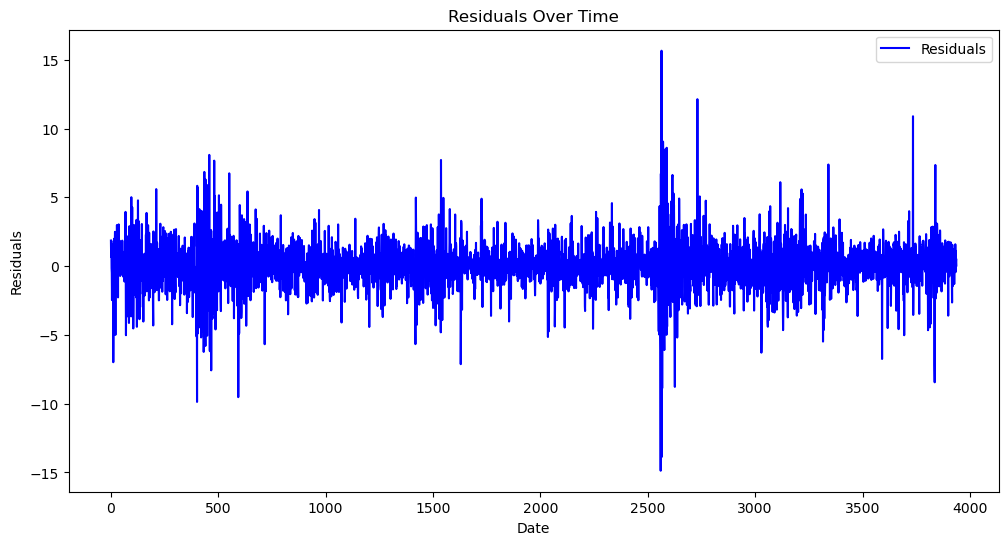

In [25]:
arma_residuals = arma_model.resid

plt.figure(figsize=(12, 6))
plt.plot(arma_residuals, label='Residuals', color='blue')
plt.title("Residuals Over Time")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.legend()
plt.show()

In [26]:
ljung_box_result = acorr_ljungbox(arma_residuals, lags=[np.floor(np.sqrt(len(jpm_return)))], return_df=True)
print(ljung_box_result)

       lb_stat  lb_pvalue
62  104.672575   0.000574


The p-value is: 0.000574, which is well below 0.05

We reject the null hypothesis, residuals are not white noise.
Even after using ARMA(2,2), there is significant autocorrelation remaining.
However, the model is better suited than the previous one.

## Generalized Autoregressive Conditional Heteroskedasticity (GARCH) Model

$$
X_t = \mu + \epsilon_t
$$

$$
\epsilon_t = \sigma_t z_t
$$

$$
\sigma_t^2 = \alpha_0 + \sum_{i=1}^{q} \alpha_i \epsilon_{t-i}^2 + \sum_{j=1}^{p} \beta_j \sigma_{t-j}^2
$$

In [27]:
from arch import arch_model

We can choose mean = 'Zero', 'Constant', 'AR'

dist = 'Normal', 't', 'skewt', etc.

In [28]:
garch_model = arch_model(jpm_return, mean='Zero', vol='GARCH', p=1, q=1, dist='Normal').fit()
garch_model.summary()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 24681.32820333477
Iteration:      2,   Func. Count:     14,   Neg. LLF: 8220.472090850457
Iteration:      3,   Func. Count:     20,   Neg. LLF: 7870.9918344392045
Iteration:      4,   Func. Count:     27,   Neg. LLF: 7262.076884032071
Iteration:      5,   Func. Count:     32,   Neg. LLF: 7237.945672464555
Iteration:      6,   Func. Count:     37,   Neg. LLF: 7237.195886371133
Iteration:      7,   Func. Count:     41,   Neg. LLF: 7237.195474173042
Iteration:      8,   Func. Count:     45,   Neg. LLF: 7237.195444633951
Iteration:      9,   Func. Count:     48,   Neg. LLF: 7237.195444635914
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7237.195444633951
            Iterations: 9
            Function evaluations: 48
            Gradient evaluations: 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7237.20
Distribution:                  Normal   AIC:                           14480.4
Method:            Maximum Likelihood   BIC:                           14499.2
                                        No. Observations:                 3938
Date:                Fri, Nov 28 2025   Df Residuals:                     3938
Time:                        13:05:09   Df Model:                            0
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0999  4.179e-02      2.392  1.678e-02 [1.803e-02,  0.182]
alpha[1]       0.0896  2.424e-02      3.697  2.177e-04 [4.213e-02,  0.137]
beta[1]        0.8735  3.714e-02     23.519 2.636e-122   [  0.801,  0.946]
==========================================================================

Covariance estimator: robust
"""

In [29]:
# Extract residuals
eps = garch_model.resid               # epsilon_t
sigma = garch_model.conditional_volatility    # sigma_t
z = garch_model.std_resid                    # standardized residuals: z_t = eps_t / sigma_t

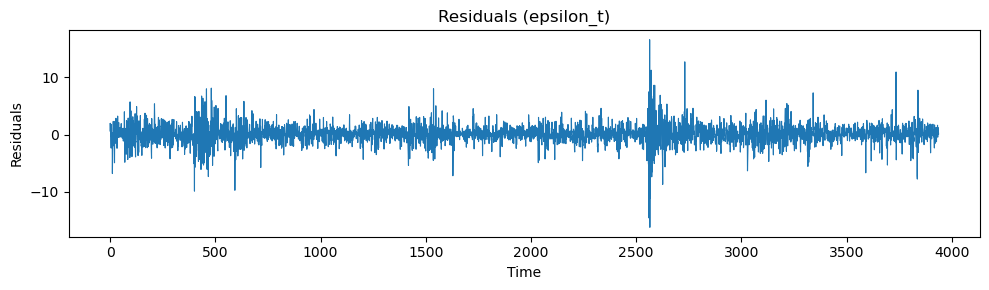

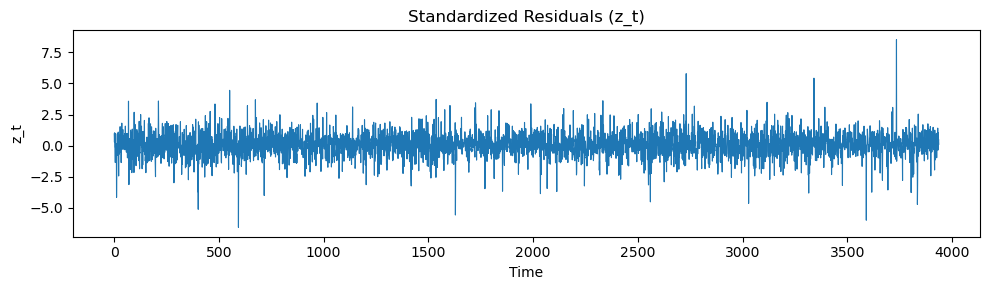

In [30]:
# Residuals over time
plt.figure(figsize=(10, 3))
plt.plot(eps, lw=0.8)
plt.title("Residuals (epsilon_t)")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# Standardized residuals over time
plt.figure(figsize=(10, 3))
plt.plot(z, lw=0.8)
plt.title("Standardized Residuals (z_t)")
plt.xlabel("Time")
plt.ylabel("z_t")
plt.tight_layout()
plt.show()

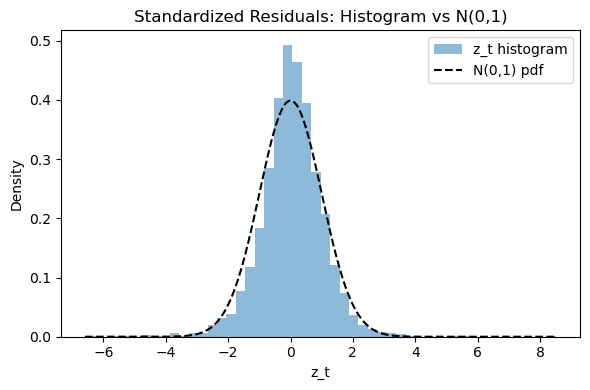

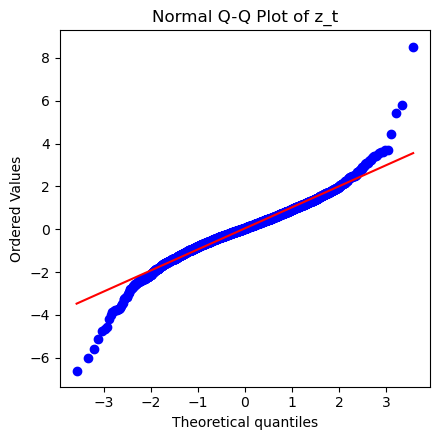

In [31]:
from scipy.stats import norm, probplot, skew, kurtosis

# Histogram of z with standard normal pdf
plt.figure(figsize=(6, 4))
count, bins, _ = plt.hist(z, bins=50, density=True, alpha=0.5, edgecolor="none", label="z_t histogram")
x = np.linspace(z.min(), z.max(), 400)
plt.plot(x, norm.pdf(x), "k--", label="N(0,1) pdf")
plt.title("Standardized Residuals: Histogram vs N(0,1)")
plt.xlabel("z_t")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# Normal Q-Q plot for z
plt.figure(figsize=(4.5, 4.5))
probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot of z_t")
plt.tight_layout()
plt.show()


A Q-Q plot (Quantile–Quantile plot) is a diagnostic graph used to assess whether a dataset follows a particular theoretical distribution — most commonly the normal distribution.

How it works:
- The x-axis shows theoretical quantiles from the reference distribution (e.g., standard normal).
- The y-axis shows observed quantiles from your sample.

If the sample follows the theoretical distribution, the points should fall approximately along the 45° reference line.

Here we have strong curvature in both tails
- Left tail points fall below the line
- Right tail points fall above the line

This indicates:
- Heavy tails: the data have more extreme values than a normal distribution would predict.

The Student-t distribution naturally has fat tails, so it might be better suited. 

Iteration:      1,   Func. Count:      6,   Neg. LLF: 23393.267710354114
Iteration:      2,   Func. Count:     15,   Neg. LLF: 9305.282300204599
Iteration:      3,   Func. Count:     22,   Neg. LLF: 10175.03779192112
Iteration:      4,   Func. Count:     28,   Neg. LLF: 10803.063730025766
Iteration:      5,   Func. Count:     36,   Neg. LLF: 7062.552275537717
Iteration:      6,   Func. Count:     42,   Neg. LLF: 7052.98509996428
Iteration:      7,   Func. Count:     47,   Neg. LLF: 7052.982465236373
Iteration:      8,   Func. Count:     52,   Neg. LLF: 7052.9824529419575
Iteration:      9,   Func. Count:     56,   Neg. LLF: 7052.982452941955
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7052.9824529419575
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9


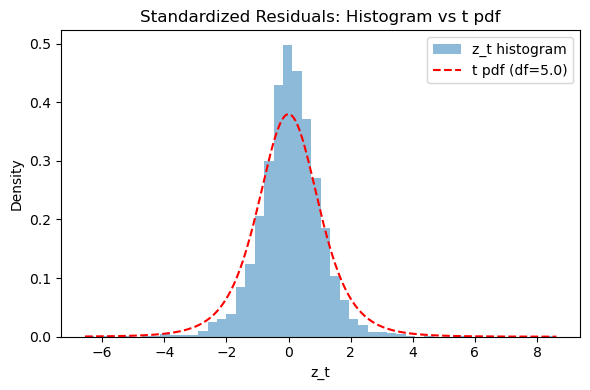

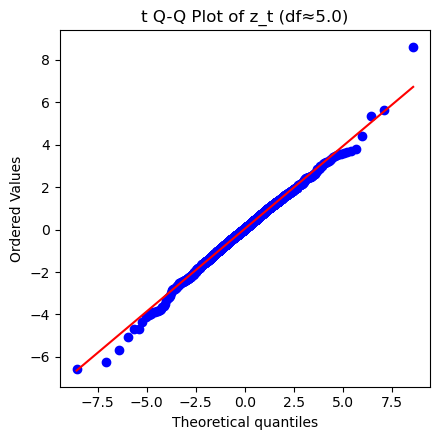

In [32]:
from scipy.stats import t as student_t, probplot

am_t = arch_model(jpm_return, mean='Zero', vol='GARCH', p=1, q=1, dist='t')
res_t = am_t.fit()

#Extract standardized residuals and estimated df
z_t = res_t.std_resid     # standardized residuals: epsilon_t / sigma_t
df_t = float(res_t.params.get("nu"))  # estimated degrees of freedom

#Histogram with Student-t pdf 
plt.figure(figsize=(6, 4))
plt.hist(z_t, bins=50, density=True, alpha=0.5, edgecolor="none", label="z_t histogram")
x = np.linspace(z_t.min(), z_t.max(), 400)
plt.plot(x, student_t.pdf(x, df=df_t), "r--", label=f"t pdf (df={df_t:.1f})")
plt.title("Standardized Residuals: Histogram vs t pdf")
plt.xlabel("z_t")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# Student-t Q-Q plot for z_t
plt.figure(figsize=(4.5, 4.5))
probplot(z_t, dist=student_t, sparams=(df_t,), plot=plt)
plt.title(f"t Q-Q Plot of z_t (df≈{df_t:.1f})")
plt.tight_layout()
plt.show()

Prediction for next period

In [33]:
res_t.forecast(horizon=1).variance.values[0,0]

1.2029464952379587

<div class="alert alert-success">
    <b>EXERCISE:</b>
    <ul>
        <li>Write a loop to find the best GARCH model order (<code>p</code>, <code>q</code>) where <code>p</code> ranges from 1 to 5 and <code>q</code> ranges from 1 to 5, using the Bayesian Information Criterion (BIC) for selection.</li>
        <li>Using a rolling window of 252 observations, predict the volatility for the next period for each window.</li>
        <li>Plot the squared predicted volatility against the squared returns for comparison.</li>
    </ul>
</div>

In [34]:
best_bic = np.inf  
best_order = None  

for p in range(1, 6):  
    for q in range(1, 6):  
        model = arch_model(jpm_return, mean='Zero', vol='GARCH', p=p, q=q, dist='t').fit()
        if model.bic < best_bic:
            best_bic = model.bic
            best_order = (p, q)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 23393.267710354114
Iteration:      2,   Func. Count:     15,   Neg. LLF: 9305.282300204599
Iteration:      3,   Func. Count:     22,   Neg. LLF: 10175.03779192112
Iteration:      4,   Func. Count:     28,   Neg. LLF: 10803.063730025766
Iteration:      5,   Func. Count:     36,   Neg. LLF: 7062.552275537717
Iteration:      6,   Func. Count:     42,   Neg. LLF: 7052.98509996428
Iteration:      7,   Func. Count:     47,   Neg. LLF: 7052.982465236373
Iteration:      8,   Func. Count:     52,   Neg. LLF: 7052.9824529419575
Iteration:      9,   Func. Count:     56,   Neg. LLF: 7052.982452941955
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7052.9824529419575
            Iterations: 9
            Function evaluations: 56
            Gradient evaluations: 9
Iteration:      1,   Func. Count:      7,   Neg. LLF: 61292.09627358437
Iteration:      2,   Func. Count:     16,   Neg. LLF: 10987.6568016510

In [35]:
print(f"best order is {best_order}")

best order is (1, 1)


In [36]:
rolling_window = 252  
predicted_vol = []
realized_vol = []
     
for start in range(len(jpm_return) - rolling_window):
    train_data = jpm_return[start:start + rolling_window]
    model = arch_model(train_data, vol='Garch', p=best_order[0], q=best_order[1]).fit()
    forecast = model.forecast(horizon=1)
    predicted_vol.append(np.sqrt(forecast.variance.values[0,0]))

Iteration:      1,   Func. Count:      6,   Neg. LLF: 548856316.9383111
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1236.7855331650344
Iteration:      3,   Func. Count:     22,   Neg. LLF: 893.1372162259206
Iteration:      4,   Func. Count:     30,   Neg. LLF: 524.829374025912
Iteration:      5,   Func. Count:     36,   Neg. LLF: 523.068999486307
Iteration:      6,   Func. Count:     42,   Neg. LLF: 521.8133227276975
Iteration:      7,   Func. Count:     48,   Neg. LLF: 521.7641613561954
Iteration:      8,   Func. Count:     53,   Neg. LLF: 521.7638618053054
Iteration:      9,   Func. Count:     58,   Neg. LLF: 521.7638596148533
Iteration:     10,   Func. Count:     62,   Neg. LLF: 521.7638596145558
Optimization terminated successfully    (Exit mode 0)
            Current function value: 521.7638596148533
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10
Iteration:      1,   Func. Count:      6,   Neg. LLF: 589810905.8412845


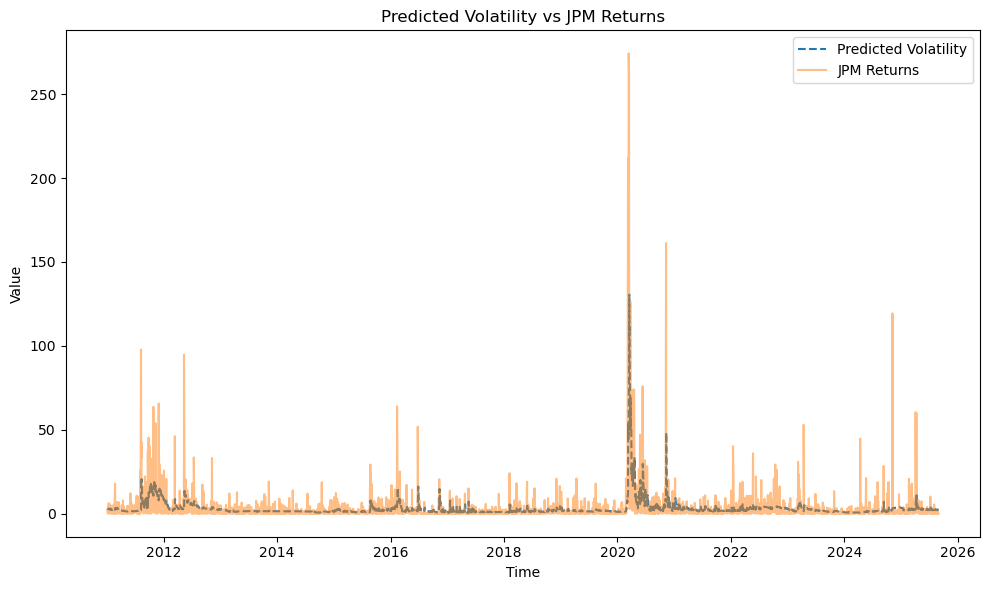

In [37]:
JPM_returns = log_returns['JPM'][rolling_window:] **2

predicted_vol_series = pd.Series([x**2 for x in predicted_vol], index=JPM_returns.index)

comparison_df = pd.DataFrame({
    'Predicted_Vol': predicted_vol_series,
    'Returns': JPM_returns
})

plt.figure(figsize=(10, 6))
plt.plot(comparison_df.index, comparison_df['Predicted_Vol'], label='Predicted Volatility', linestyle='--')
plt.plot(comparison_df.index, comparison_df['Returns'], label='JPM Returns', alpha=0.5)
plt.title('Predicted Volatility vs JPM Returns')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()